<a id='top_cell'></a>

<h2>WeatherPy Analysis</h2>
<blockquote><p>For this project, I created a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, I utilized a simple Python library called [citipy](https://pypi.python.org/pypi/citipy) and the [OpenWeatherMap API](https://openweathermap.org/api). </p></blockquote>

<strong>Analysis</strong>
<ul>
<li>From the [City Latitude vs. Max Temperature graph](#another_cell), I can see that a lower absolute value of latitudes show higher temperature. This means that areas closer to the equator receive higher temperatures, whereas areas farther away from the equator receive lower temperatures. </li>
<li>From the [Latitude vs. Humidity Plot](#hum_cell), it appears that the average humidity is higher where the latitude is higher (northern hemisphere). However, my data is takien from the middle of March 2018. This may be due to the seasons. A more accurate assessment would have to be taken with historical data from the different times of the year.</li>
<li>From the [Latitude vs Windspeed Plot](#wind_cell), the lower wind speeds appeared closer to the equator (lower absolute values of latitudes). By contrast, higher wind speeds appear farther from the equator.</li>
<li>There aren't any visible patterns in the [Latitude vs Cloudiness plot](#cloud_cell).</li>
</ul>


<p>Additional Resources:</p>
<ul>
<li>[geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm)</li>
<li>[citypy](https://github.com/wingchen/citipy)</li>
</ul>

In [115]:
import requests
from citipy import citipy
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import logging #dir(logging)
import seaborn as sns

In [7]:
api_address = "http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q="
api_key = '224f7b3f56aba61567ec7c77e410d506'

In [9]:
# Creating coordinate points. A point is referenced by its longitude and latitude values.
#Utilize numpy.random to generate random latitudes and longitudes.
#Latitude values are measured relative to the equator and range from -90° at the South Pole to +90° at the North Pole. 
#Longitude values are measured relative to the prime meridian. They range from -180° when traveling west to 180° when traveling east.
#Since the size is 2500, 2,500 values will be generated.
#These points will append to the coordinates series/list.
cities = []
coordinates = []

lat = np.random.uniform(low=-90, high=90, size=2500)
lng = np.random.uniform(low=-180, high=180, size=2500)

for x in range(0,len(lat)):
    coordinates.append((lat[x], lng[x]))
    
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon))

# Creating DataFrame
# Find the cities.
cities_df = pd.DataFrame(cities)
cities_df["City Name"] = ""
cities_df["Country Code"] = ""
cities_df.head()

0 City Name Country Code
0  <citipy.citipy.City object at 0x0000029B032E84E0>                       
1  <citipy.citipy.City object at 0x0000029B04D676D8>                       
2  <citipy.citipy.City object at 0x0000029B03910748>                       
3  <citipy.citipy.City object at 0x0000029B04A26908>                       
4  <citipy.citipy.City object at 0x0000029B02FDFCF8>

In [10]:
print(coordinates[1])
print(cities[1])

(-18.202419988366501, 179.80155485946676)


In [11]:
coordinates_df = pd.DataFrame({"Lat": lat,
                              "Lon": lng})
coordinates_df.head()

Lat         Lon
0 -52.730814 -112.630807
1 -52.730814  179.801555
2 -52.730814  135.652084
3 -52.730814 -178.948781
4 -52.730814  -74.257536

In [12]:
coord_df = coordinates_df
coord_df.head()

Lat         Lon
0 -52.730814 -112.630807
1 -52.730814  179.801555
2 -52.730814  135.652084
3 -52.730814 -178.948781
4 -52.730814  -74.257536

In [14]:
coord_df['City Name'] = ""
coord_df['Country'] = ""
coord_df['Temperature (F)'] = ""
coord_df['Humidity (%)'] = ""
coord_df['Cloudiness (%)'] = ""
coord_df['Wind Speed (mph)'] = ""

coord_df.head()

Lat         Lon City Name Country Temperature (F) Humidity (%)  \
0 -52.730814 -112.630807                                                  
1 -52.730814  179.801555                                                  
2 -52.730814  135.652084                                                  
3 -52.730814 -178.948781                                                  
4 -52.730814  -74.257536                                                  

  Cloudiness (%) Wind Speed (mph)  
0                                  
1                                  
2                                  
3                                  
4

In [16]:
#pandas iloc 
for index, row in cities_df.iterrows():
    row["City Name"] = cities_df.iloc[index,0].city_name
    row["Country Code"] = cities_df.iloc[index,0].country_code
    #iloc[index,0]
print(cities_df)
# Drop duplicate cities.
cities_df.drop_duplicates(['City Name', 'Country Code'], inplace=True)
cities_df.reset_index(inplace=True)

# # Delete unnecessary columns
del cities_df[0]
del cities_df['index']

cities_df.head()

                                                      0         City Name  \
0     <citipy.citipy.City object at 0x0000029B032E84E0>      punta arenas   
1     <citipy.citipy.City object at 0x0000029B04D676D8>           isangel   
2     <citipy.citipy.City object at 0x0000029B03910748>              biak   
3     <citipy.citipy.City object at 0x0000029B04A26908>             kapaa   
4     <citipy.citipy.City object at 0x0000029B02FDFCF8>           ushuaia   
5     <citipy.citipy.City object at 0x0000029B02FF64E0>       neulengbach   
6     <citipy.citipy.City object at 0x0000029B0409A8D0>           mataura   
7     <citipy.citipy.City object at 0x0000029B045BF8D0>        chokurdakh   
8     <citipy.citipy.City object at 0x0000029B03018D68>           ngukurr   
9     <citipy.citipy.City object at 0x0000029B0323A080>       clyde river   
10    <citipy.citipy.City object at 0x0000029B04A264E0>              hilo   
11    <citipy.citipy.City object at 0x0000029B030047F0>            albany   

City Name Country Code
0  punta arenas           cl
1       isangel           vu
2          biak           id
3         kapaa           us
4       ushuaia           ar

In [17]:
cities_df.head()

City Name Country Code
0  punta arenas           cl
1       isangel           vu
2          biak           id
3         kapaa           us
4       ushuaia           ar

In [18]:
# Adding columns for values for cities_df, not coordinates_df. 
cities_df['Latitude'] = ""
cities_df['Longitude'] = ""
cities_df['Temperature (F)'] = ""
cities_df['Humidity (%)'] = ""
cities_df['Cloudiness (%)'] = ""
cities_df['Wind Speed (mph)'] = ""

cities_df.head()

City Name Country Code Latitude Longitude Temperature (F) Humidity (%)  \
0  punta arenas           cl                                                   
1       isangel           vu                                                   
2          biak           id                                                   
3         kapaa           us                                                   
4       ushuaia           ar                                                   

  Cloudiness (%) Wind Speed (mph)  
0                                  
1                                  
2                                  
3                                  
4

In [19]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
#query_url = f"{url}appid={api_key}&units={units}&q="
query_url = f"{url}appid={api_key}&units={units}"

In [20]:
api_key

'224f7b3f56aba61567ec7c77e410d506'

In [112]:
#TRY LOGGING
LOG_FORMAT = "%(message)s"
logging.basicConfig(filename="C:\\Users\\nisha\\Desktop\\Week7\\weatherpy.log" , level = logging.INFO, format = LOG_FORMAT, 
                    filemode = 'w')
#logger = getLogger()
logger = logging.getLogger(__name__)
logger.info("Beginning Data Retrieval")
logger.info("---------------------------------")

for index, row in cities_df.iterrows():
    #for index, row in cities_df.iterrows():
#for row in cities_df:
#.items
    #to test print row and two of the series from that row:
    logger.info(index, row, row['City Name'], row['Country Code']) 
    logger.info("Processing Record " + str(index) + "of Set 1 | " + str(row['City Name']))
     #url = "http://api.openweathermap.org/data/2.5/weather?q=%s,%s&units=imperial&appid=%s" % (row['City Name'], row['Country Code'], api_key)
#     params = {
#         "key": api_key
#     }
    url = "http://api.openweathermap.org/data/2.5/weather?appid=%s&q=%s&units=imperial" % (api_key, row['City Name'])
    #print(url)
    weather_data = requests.get(url)
    #.json() above
    logger.info(weather_data.url)
    weather_data = weather_data.json()
    #Append
    
    try:
    #Append the data with exception handling in case data doesn't exist for a city. 
#         cities_df.loc[index, 'Latitude'] = weather_data['coord']['lat']
#         cities_df.loc[index,'Longitude'] = weather_data['coord']['lon']
#         cities_df.loc[index,'Temperature (F)'] = weather_data['main']['temp']
#         cities_df.loc[index,'Humidity (%)'] = weather_data['main']['humidity']
#         cities_df.loc[index,'Cloudiness (%)'] = weather_data['clouds']['all']
#         cities_df.loc[index,'Wind Speed (mph)'] = weather_data['wind']['speed']
        
        lati = weather_data['coord']['lat']
        long = weather_data['coord']['lon']
        temper = weather_data['main']['temp']
        humi = weather_data['main']['humidity']
        cloud = weather_data['clouds']['all']
        wind = weather_data['wind']['speed']
        
        cities_df.set_value(index, "Latitude", lati)
        cities_df.set_value(index, "Longitude", long)
        cities_df.set_value(index, "Temperature (F)", temper)
        cities_df.set_value(index, "Humidity (%)", humi)
        cities_df.set_value(index, "Cloudiness (%)", cloud)
        cities_df.set_value(index, "Wind Speed (mph)", wind)
           
    except:
        logger.info("Error")
        continue
    
    
    #use exception handling in case the city doesn't match
print("---------------------------------")
print("Data Retrieval Complete")
print("---------------------------------")

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\nisha\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\nisha\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\nisha\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-112-c5535f815a17>", line 15, in <module>
    logger.info(index, row, row['City Name'], row['Country Code'])
Message: 104
Arguments: (City Name           kahului
Country Code             us
Latitude              20.89
Longitude           -156.47
Temperature (F)       74.66
Humidity (%)             94
Cloudiness (%)          

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\nisha\Anaconda\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\nisha\Anaconda\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Users\nisha\Anaconda\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\nisha\Anaconda\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\nisha\Anaconda\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handl

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

  File "C:\Users\nisha\Anaconda\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Users\nisha\Anaconda\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\nisha\Anaconda\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\nisha\Anaconda\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\nisha\Anaconda\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\nisha\Anaconda\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipyker

  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\nisha\Anaconda\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\nisha\Anaconda\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Users\nisha\Anaconda\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\nisha\Anaconda\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\nisha\Anaconda\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\nisha\Anaconda\lib\site-packages\zmq\eventloop\zmqstream.py", l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app

  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\nisha\Ana

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\nisha\Anaconda\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\nisha\Anaconda\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Users\nisha\Anaconda\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\nisha\Anaconda\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
 

  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\nisha\Anaconda\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\nisha\Anaconda\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Users\nisha\Anaconda\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\nisha\Anaconda\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\nisha\Anaconda\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\nisha\Anaconda\lib\site-packages\zmq\eventloop\zmqstream.py", l

  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\nisha\Anaconda\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\nisha\Anaconda\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Users\nisha\Anaconda\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\nisha\Anaconda\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\nisha\Anaconda\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\nisha\Anaconda\lib\site-packages\zmq\eventloop\zmqstream.py", l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\nisha\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\nisha\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\nisha\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-112-c5535f815a17>", line 15, in <module>
    logger.info(index, row, row['City Name'], row['Country Code'])
Message: 404
Arguments: (City Name          

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\nisha\Anaconda\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\nisha\Anaconda\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Users\nisha\Anaconda\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\nisha\Anaconda\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
 

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\nisha\Anaconda\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\nisha\Anaconda\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Users\nisha\Anaconda\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\nisha\Anaconda\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
 

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

  File "C:\Users\nisha\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-112-c5535f815a17>", line 15, in <module>
    logger.info(index, row, row['City Name'], row['Country Code'])
Message: 606
Arguments: (City Name           sao gotardo
Country Code                 br
Latitude                 -19.31
Longitude                -46.05
Temperature (F)           72.44
Humidity (%)                 84
Cloudiness (%)               88
Wind Speed (mph)           3.53
Name: 606, dtype: object, 'sao gotardo', 'br')
--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.ge

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\nisha\Anaconda\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\nisha\Anaconda\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Users\nisha\Anaconda\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\nisha\Anaconda\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\nisha\Anaconda\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\nisha\Anaconda\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\nisha\Anaconda\lib\site-packages\tornado\stack_context.p

Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\nisha\Anaconda\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\nisha\Anaconda\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Users\nisha\Anaconda\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\nisha\Anaconda\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\nisha\Anaconda\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handl

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

  File "C:\Users\nisha\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\nisha\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\nisha\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-112-c5535f815a17>", line 15, in <module>
    logger.info(index, row, row['City Name'], row['Country Code'])
Message: 833
Arguments: (City Name           calama
Country Code            cl
Latitude            -22.46
Longitude           -68.93
Temperature (F)       62.6
Humidity (%)            36
Cloudiness (%)           0
Wind Speed (mph)     19.46
Name: 833, dtype: object, 'calama', 'cl')
--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\nisha\Anaconda\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\nisha\Anaconda\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Users\nisha\Anaconda\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\nisha\Anaconda\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
 

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\nisha\Anaconda\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\nisha\Anaconda\lib\site-packages\tornado\ioloop.py", line 888, in start
    handl

Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

---------------------------------
Data Retrieval Complete
---------------------------------


--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 575, in format
    record.message = record.getMessage()
  File "C:\Users\nisha\Anaconda\lib\logging\__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nisha\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nisha\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nisha\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in l

In [113]:
print("Beginning Data Retrieval")
print("---------------------------------")

for index, row in cities_df.iterrows():
    #for index, row in cities_df.iterrows():
#for row in cities_df:
#.items
    #to test print row and two of the series from that row:
    print(index, row, row['City Name'], row['Country Code']) 
    print("Processing Record " + str(index) + "of Set 1 | " + str(row['City Name']))
     #url = "http://api.openweathermap.org/data/2.5/weather?q=%s,%s&units=imperial&appid=%s" % (row['City Name'], row['Country Code'], api_key)
#     params = {
#         "key": api_key
#     }
    url = "http://api.openweathermap.org/data/2.5/weather?appid=%s&q=%s&units=imperial" % (api_key, row['City Name'])
    print(url)
    weather_data = requests.get(url)
    #.json() above
    print(weather_data.url)
    weather_data = weather_data.json()
    #Append
    
    try:
    #Append the data with exception handling in case data doesn't exist for a city. 
#         cities_df.loc[index, 'Latitude'] = weather_data['coord']['lat']
#         cities_df.loc[index,'Longitude'] = weather_data['coord']['lon']
#         cities_df.loc[index,'Temperature (F)'] = weather_data['main']['temp']
#         cities_df.loc[index,'Humidity (%)'] = weather_data['main']['humidity']
#         cities_df.loc[index,'Cloudiness (%)'] = weather_data['clouds']['all']
#         cities_df.loc[index,'Wind Speed (mph)'] = weather_data['wind']['speed']
        
        lati = weather_data['coord']['lat']
        long = weather_data['coord']['lon']
        temper = weather_data['main']['temp']
        humi = weather_data['main']['humidity']
        cloud = weather_data['clouds']['all']
        wind = weather_data['wind']['speed']
        
        cities_df.set_value(index, "Latitude", lati)
        cities_df.set_value(index, "Longitude", long)
        cities_df.set_value(index, "Temperature (F)", temper)
        cities_df.set_value(index, "Humidity (%)", humi)
        cities_df.set_value(index, "Cloudiness (%)", cloud)
        cities_df.set_value(index, "Wind Speed (mph)", wind)
        
#Temperature (F)	Humidity (%)	Cloudiness (%)	Wind Speed (mph)
#         row['Longitude'] = weather_data['coord']['lon']
#         row['Temperature (F)'] = weather_data['main']['temp']
#         row['Humidity (%)'] = weather_data['main']['humidity']
#         row['Cloudiness (%)'] = weather_data['clouds']['all']
#         row['Wind Speed (mph)'] = weather_data['wind']['speed']
    
    except:
        print("Error")
        continue
    
    
    #use exception handling in case the city doesn't match
print("---------------------------------")
print("Data Retrieval Complete")
print("---------------------------------")

Beginning Data Retrieval
---------------------------------
0 City Name           punta arenas
Country Code                  cl
Latitude                  -53.16
Longitude                 -70.91
Temperature (F)               41
Humidity (%)                  65
Cloudiness (%)                40
Wind Speed (mph)            6.93
Name: 0, dtype: object punta arenas cl
Processing Record 0of Set 1 | punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=punta arenas&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=punta%20arenas&units=imperial
1 City Name           isangel
Country Code             vu
Latitude             -19.55
Longitude            169.27
Temperature (F)       80.36
Humidity (%)            100
Cloudiness (%)           36
Wind Speed (mph)       9.46
Name: 1, dtype: object isangel vu
Processing Record 1of Set 1 | isangel
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=margate&units=imperial
19 City Name           atuona
Country Code            pf
Latitude              -9.8
Longitude          -139.03
Temperature (F)      82.07
Humidity (%)            99
Cloudiness (%)          56
Wind Speed (mph)     19.64
Name: 19, dtype: object atuona pf
Processing Record 19of Set 1 | atuona
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=atuona&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=atuona&units=imperial
20 City Name           fort smith
Country Code                us
Latitude                 35.39
Longitude               -94.42
Temperature (F)          60.82
Humidity (%)                59
Cloudiness (%)               1
Wind Speed (mph)         11.41
Name: 20, dtype: object fort smith us
Processing Record 20of Set 1 | fort smith
http://api.openweathermap.org/data/2.5/weather?

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=busselton&units=imperial
37 City Name           jamestown
Country Code               sh
Latitude               -33.21
Longitude               138.6
Temperature (F)         64.25
Humidity (%)               61
Cloudiness (%)              0
Wind Speed (mph)         8.12
Name: 37, dtype: object jamestown sh
Processing Record 37of Set 1 | jamestown
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=jamestown&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=jamestown&units=imperial
38 City Name           bonthe
Country Code            sl
Latitude              7.53
Longitude            -12.5
Temperature (F)      78.83
Humidity (%)            87
Cloudiness (%)           0
Wind Speed (mph)      4.65
Name: 38, dtype: object bonthe sl
Processing Record 38of Set 1 | bonthe
http://api.openweathermap.org/data/2.5/weather?ap

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=thunder%20bay&units=imperial
58 City Name           bredasdorp
Country Code                za
Latitude                -34.53
Longitude                20.04
Temperature (F)           66.2
Humidity (%)                88
Cloudiness (%)              20
Wind Speed (mph)          5.82
Name: 58, dtype: object bredasdorp za
Processing Record 58of Set 1 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=bredasdorp&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=bredasdorp&units=imperial
59 City Name            lebu
Country Code           cl
Latitude             8.96
Longitude           38.73
Temperature (F)      57.2
Humidity (%)           76
Cloudiness (%)         75
Wind Speed (mph)      4.7
Name: 59, dtype: object lebu cl
Processing Record 59of Set 1 | lebu
http://api.openweathermap.org/data/2.5/weathe

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=saint-pierre&units=imperial
74 City Name           pasighat
Country Code              in
Latitude               28.06
Longitude              95.33
Temperature (F)        49.13
Humidity (%)              86
Cloudiness (%)             0
Wind Speed (mph)        2.53
Name: 74, dtype: object pasighat in
Processing Record 74of Set 1 | pasighat
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=pasighat&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=pasighat&units=imperial
75 City Name           putina
Country Code            pe
Latitude            -14.91
Longitude           -69.87
Temperature (F)       46.4
Humidity (%)            81
Cloudiness (%)          75
Wind Speed (mph)     13.87
Name: 75, dtype: object putina pe
Processing Record 75of Set 1 | putina
http://api.openweathermap.org/data/2.5/weather?appid=224f7

95 City Name           la cruz
Country Code             mx
Latitude              23.92
Longitude           -106.89
Temperature (F)       86.48
Humidity (%)             27
Cloudiness (%)            0
Wind Speed (mph)       6.22
Name: 95, dtype: object la cruz mx
Processing Record 95of Set 1 | la cruz
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=la cruz&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=la%20cruz&units=imperial
96 City Name           avera
Country Code           pf
Latitude            33.19
Longitude          -82.53
Temperature (F)     71.62
Humidity (%)           40
Cloudiness (%)          1
Wind Speed (mph)     4.99
Name: 96, dtype: object avera pf
Processing Record 96of Set 1 | avera
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=avera&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=dzhebariki-khaya&units=imperial
112 City Name           tasiilaq
Country Code              gl
Latitude               65.61
Longitude             -37.64
Temperature (F)         35.6
Humidity (%)              80
Cloudiness (%)            92
Wind Speed (mph)       24.16
Name: 112, dtype: object tasiilaq gl
Processing Record 112of Set 1 | tasiilaq
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=tasiilaq&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=tasiilaq&units=imperial
113 City Name           port augusta
Country Code                  au
Latitude                  -32.49
Longitude                 137.76
Temperature (F)             66.2
Humidity (%)                  59
Cloudiness (%)                 0
Wind Speed (mph)            9.17
Name: 113, dtype: object port augusta au
Processing Record 113of Set 1 | p

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=ust-nera&units=imperial
130 City Name           hobart
Country Code            au
Latitude            -42.88
Longitude           147.33
Temperature (F)       66.2
Humidity (%)            55
Cloudiness (%)          20
Wind Speed (mph)     24.16
Name: 130, dtype: object hobart au
Processing Record 130of Set 1 | hobart
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=hobart&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=hobart&units=imperial
131 City Name           kholmsk
Country Code             ru
Latitude              47.05
Longitude            142.05
Temperature (F)        28.4
Humidity (%)             58
Cloudiness (%)           40
Wind Speed (mph)      11.18
Name: 131, dtype: object kholmsk ru
Processing Record 131of Set 1 | kholmsk
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba6156

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=mardin&units=imperial
145 City Name            jalu
Country Code           ly
Latitude            29.03
Longitude           21.55
Temperature (F)     57.05
Humidity (%)           54
Cloudiness (%)          0
Wind Speed (mph)     8.46
Name: 145, dtype: object jalu ly
Processing Record 145of Set 1 | jalu
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=jalu&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=jalu&units=imperial
146 City Name           arani
Country Code           bo
Latitude            13.33
Longitude           80.08
Temperature (F)      75.2
Humidity (%)           94
Cloudiness (%)         20
Wind Speed (mph)     3.36
Name: 146, dtype: object arani bo
Processing Record 146of Set 1 | arani
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=arani&units=imperial

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=ituango&units=imperial
164 City Name           penzance
Country Code              gb
Latitude               50.12
Longitude              -5.53
Temperature (F)         30.2
Humidity (%)              86
Cloudiness (%)            92
Wind Speed (mph)       24.16
Name: 164, dtype: object penzance gb
Processing Record 164of Set 1 | penzance
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=penzance&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=penzance&units=imperial
165 City Name           hermanus
Country Code              za
Latitude              -34.42
Longitude              19.24
Temperature (F)         59.3
Humidity (%)              92
Cloudiness (%)            68
Wind Speed (mph)        2.53
Name: 165, dtype: object hermanus za
Processing Record 165of Set 1 | hermanus
http://api.openweathermap.org/data/2.

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=koslan&units=imperial
184 City Name           parana
Country Code            br
Latitude             -7.52
Longitude           -72.89
Temperature (F)       80.6
Humidity (%)            78
Cloudiness (%)          40
Wind Speed (mph)      2.98
Name: 184, dtype: object parana br
Processing Record 184of Set 1 | parana
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=parana&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=parana&units=imperial
185 City Name           atbasar
Country Code             kz
Latitude              51.81
Longitude             68.36
Temperature (F)       28.16
Humidity (%)             87
Cloudiness (%)           44
Wind Speed (mph)      15.84
Name: 185, dtype: object atbasar kz
Processing Record 185of Set 1 | atbasar
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567e

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=kangaatsiaq&units=imperial
207 City Name           komsomolskiy
Country Code                  ru
Latitude                   67.55
Longitude                  63.78
Temperature (F)           -12.61
Humidity (%)                  77
Cloudiness (%)                44
Wind Speed (mph)            9.91
Name: 207, dtype: object komsomolskiy ru
Processing Record 207of Set 1 | komsomolskiy
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=komsomolskiy&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=komsomolskiy&units=imperial
208 City Name           rodrigues alves
Country Code                     br
Latitude                      -7.74
Longitude                    -72.65
Temperature (F)                80.6
Humidity (%)                     78
Cloudiness (%)                   40
Wind Speed (mph)               2.98
Name: 2

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=lagoa&units=imperial
228 City Name           cidreira
Country Code              br
Latitude              -30.17
Longitude             -50.22
Temperature (F)        79.28
Humidity (%)              82
Cloudiness (%)            64
Wind Speed (mph)        9.13
Name: 228, dtype: object cidreira br
Processing Record 228of Set 1 | cidreira
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=cidreira&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=cidreira&units=imperial
230 City Name           loandjili
Country Code               cg
Latitude                -4.77
Longitude               11.87
Temperature (F)          82.4
Humidity (%)               78
Cloudiness (%)             40
Wind Speed (mph)          4.7
Name: 230, dtype: object loandjili cg
Processing Record 230of Set 1 | loandjili
http://api.openweathermap.org

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=praia%20da%20vitoria&units=imperial
248 City Name            emba
Country Code           kz
Latitude            34.81
Longitude           32.42
Temperature (F)     57.78
Humidity (%)           62
Cloudiness (%)          0
Wind Speed (mph)     5.82
Name: 248, dtype: object emba kz
Processing Record 248of Set 1 | emba
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=emba&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=emba&units=imperial
249 City Name           thai binh
Country Code               vn
Latitude                20.45
Longitude              106.33
Temperature (F)         72.17
Humidity (%)               97
Cloudiness (%)             92
Wind Speed (mph)         8.01
Name: 249, dtype: object thai binh vn
Processing Record 249of Set 1 | thai binh
http://api.openweathermap.org/data/2.5/weather?appid=2

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=te%20anau&units=imperial
265 City Name           felipe carrillo puerto
Country Code                            mx
Latitude                             19.58
Longitude                           -88.05
Temperature (F)                      82.88
Humidity (%)                            58
Cloudiness (%)                           0
Wind Speed (mph)                      8.23
Name: 265, dtype: object felipe carrillo puerto mx
Processing Record 265of Set 1 | felipe carrillo puerto
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=felipe carrillo puerto&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=felipe%20carrillo%20puerto&units=imperial
266 City Name           aripuana
Country Code              br
Latitude               -9.17
Longitude             -60.63
Temperature (F)        79.37
Humidity (%)              84

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=umea&units=imperial
283 City Name           san cristobal
Country Code                   ec
Latitude                    -0.39
Longitude                  -78.55
Temperature (F)              60.8
Humidity (%)                   63
Cloudiness (%)                 75
Wind Speed (mph)             3.36
Name: 283, dtype: object san cristobal ec
Processing Record 283of Set 1 | san cristobal
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=san cristobal&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=san%20cristobal&units=imperial
284 City Name           port blair
Country Code                in
Latitude                 11.67
Longitude                92.75
Temperature (F)          82.25
Humidity (%)               100
Cloudiness (%)               0
Wind Speed (mph)          9.24
Name: 284, dtype: object port blair in
P

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=bethel&units=imperial
306 City Name           iqaluit
Country Code             ca
Latitude              63.75
Longitude            -68.52
Temperature (F)         8.6
Humidity (%)             78
Cloudiness (%)           40
Wind Speed (mph)       6.93
Name: 306, dtype: object iqaluit ca
Processing Record 306of Set 1 | iqaluit
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=iqaluit&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=iqaluit&units=imperial
308 City Name           vila velha
Country Code                br
Latitude                 -3.71
Longitude                -38.6
Temperature (F)           82.4
Humidity (%)                78
Cloudiness (%)               0
Wind Speed (mph)          9.17
Name: 308, dtype: object vila velha br
Processing Record 308of Set 1 | vila velha
http://api.openweathermap.org/

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=maumere&units=imperial
324 City Name           kavaratti
Country Code               in
Latitude                10.57
Longitude               72.64
Temperature (F)         81.98
Humidity (%)              100
Cloudiness (%)              0
Wind Speed (mph)         5.21
Name: 324, dtype: object kavaratti in
Processing Record 324of Set 1 | kavaratti
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=kavaratti&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=kavaratti&units=imperial
325 City Name           mareeba
Country Code             au
Latitude             -16.99
Longitude            145.42
Temperature (F)        84.2
Humidity (%)             70
Cloudiness (%)           75
Wind Speed (mph)      16.11
Name: 325, dtype: object mareeba au
Processing Record 325of Set 1 | mareeba
http://api.openweathermap.org/data/

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=guilin&units=imperial
345 City Name           port lincoln
Country Code                  au
Latitude                  -34.72
Longitude                 135.86
Temperature (F)            68.66
Humidity (%)                  82
Cloudiness (%)                76
Wind Speed (mph)           16.96
Name: 345, dtype: object port lincoln au
Processing Record 345of Set 1 | port lincoln
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=port lincoln&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=port%20lincoln&units=imperial
346 City Name           havelock
Country Code              us
Latitude               34.88
Longitude              -76.9
Temperature (F)         49.3
Humidity (%)              61
Cloudiness (%)             1
Wind Speed (mph)       11.41
Name: 346, dtype: object havelock us
Processing Record 346of Set 1

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=bocas%20del%20toro&units=imperial
365 City Name           ciudad bolivar
Country Code                    ve
Latitude                      8.12
Longitude                   -63.55
Temperature (F)              87.11
Humidity (%)                    37
Cloudiness (%)                   0
Wind Speed (mph)             14.16
Name: 365, dtype: object ciudad bolivar ve
Processing Record 365of Set 1 | ciudad bolivar
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=ciudad bolivar&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=ciudad%20bolivar&units=imperial
366 City Name            kenai
Country Code            us
Latitude             60.55
Longitude          -151.26
Temperature (F)      36.52
Humidity (%)           100
Cloudiness (%)          90
Wind Speed (mph)      6.93
Name: 366, dtype: object kenai us
Processing R

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=ikalamavony&units=imperial
384 City Name           mortka
Country Code            ru
Latitude             59.33
Longitude            66.02
Temperature (F)      31.22
Humidity (%)            93
Cloudiness (%)          88
Wind Speed (mph)      4.88
Name: 384, dtype: object mortka ru
Processing Record 384of Set 1 | mortka
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=mortka&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=mortka&units=imperial
386 City Name           roald
Country Code           no
Latitude            62.58
Longitude            6.12
Temperature (F)     36.36
Humidity (%)          100
Cloudiness (%)         75
Wind Speed (mph)     26.4
Name: 386, dtype: object roald no
Processing Record 386of Set 1 | roald
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=nantucket&units=imperial
407 City Name           bosaso
Country Code            so
Latitude             11.28
Longitude            49.18
Temperature (F)      76.31
Humidity (%)           100
Cloudiness (%)           0
Wind Speed (mph)      3.09
Name: 407, dtype: object bosaso so
Processing Record 407of Set 1 | bosaso
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=bosaso&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=bosaso&units=imperial
408 City Name           ust-kuyga
Country Code               ru
Latitude                   70
Longitude              135.55
Temperature (F)        -29.89
Humidity (%)               49
Cloudiness (%)             12
Wind Speed (mph)         2.75
Name: 408, dtype: object ust-kuyga ru
Processing Record 408of Set 1 | ust-kuyga
http://api.openweathermap.org/data/2.5/weather?ap

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=xining&units=imperial
423 City Name           saint-georges
Country Code                   gf
Latitude                    46.12
Longitude                  -70.67
Temperature (F)              14.3
Humidity (%)                   54
Cloudiness (%)                 68
Wind Speed (mph)             8.68
Name: 423, dtype: object saint-georges gf
Processing Record 423of Set 1 | saint-georges
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=saint-georges&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=saint-georges&units=imperial
424 City Name           kathu
Country Code           th
Latitude            -27.7
Longitude           23.05
Temperature (F)      60.2
Humidity (%)           94
Cloudiness (%)         24
Wind Speed (mph)     3.87
Name: 424, dtype: object kathu th
Processing Record 424of Set 1 | kathu
http://a

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=lucapa&units=imperial
442 City Name           shieli
Country Code            kz
Latitude             44.18
Longitude            66.74
Temperature (F)      32.66
Humidity (%)            90
Cloudiness (%)          36
Wind Speed (mph)      6.33
Name: 442, dtype: object shieli kz
Processing Record 442of Set 1 | shieli
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=shieli&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=shieli&units=imperial
443 City Name           molchanovo
Country Code                ru
Latitude                 57.58
Longitude                83.76
Temperature (F)          17.36
Humidity (%)                84
Cloudiness (%)               0
Wind Speed (mph)         11.59
Name: 443, dtype: object molchanovo ru
Processing Record 443of Set 1 | molchanovo
http://api.openweathermap.org/data/2.5/wea

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=massena&units=imperial
460 City Name           touros
Country Code            br
Latitude              -5.2
Longitude           -35.46
Temperature (F)      81.26
Humidity (%)            83
Cloudiness (%)          88
Wind Speed (mph)      9.57
Name: 460, dtype: object touros br
Processing Record 460of Set 1 | touros
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=touros&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=touros&units=imperial
461 City Name           klamath falls
Country Code                   us
Latitude                    42.22
Longitude                 -121.78
Temperature (F)              44.6
Humidity (%)                   39
Cloudiness (%)                 90
Wind Speed (mph)             3.36
Name: 461, dtype: object klamath falls us
Processing Record 461of Set 1 | klamath falls
http://api.

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=koumac&units=imperial
478 City Name            tezu
Country Code           in
Latitude            27.93
Longitude           96.16
Temperature (F)      46.7
Humidity (%)           73
Cloudiness (%)          0
Wind Speed (mph)     1.97
Name: 478, dtype: object tezu in
Processing Record 478of Set 1 | tezu
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=tezu&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=tezu&units=imperial
479 City Name           udachnyy
Country Code              ru
Latitude               66.42
Longitude              112.4
Temperature (F)        -1.99
Humidity (%)              79
Cloudiness (%)            56
Wind Speed (mph)        6.11
Name: 479, dtype: object udachnyy ru
Processing Record 479of Set 1 | udachnyy
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=kaeo&units=imperial
501 City Name           tabas
Country Code           ir
Latitude             33.6
Longitude           56.92
Temperature (F)     44.45
Humidity (%)          100
Cloudiness (%)        100
Wind Speed (mph)     4.43
Name: 501, dtype: object tabas ir
Processing Record 501of Set 1 | tabas
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=tabas&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=tabas&units=imperial
502 City Name            alofi
Country Code            nu
Latitude            -19.06
Longitude          -169.92
Temperature (F)         86
Humidity (%)            70
Cloudiness (%)          88
Wind Speed (mph)      5.82
Name: 502, dtype: object alofi nu
Processing Record 502of Set 1 | alofi
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=alofi&unit

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=biltine&units=imperial
520 City Name           guaruja
Country Code             br
Latitude             -23.99
Longitude            -46.26
Temperature (F)       74.84
Humidity (%)             83
Cloudiness (%)           20
Wind Speed (mph)        4.7
Name: 520, dtype: object guaruja br
Processing Record 520of Set 1 | guaruja
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=guaruja&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=guaruja&units=imperial
521 City Name           binzhou
Country Code             cn
Latitude              37.38
Longitude            117.96
Temperature (F)       35.63
Humidity (%)             89
Cloudiness (%)           32
Wind Speed (mph)       4.32
Name: 521, dtype: object binzhou cn
Processing Record 521of Set 1 | binzhou
http://api.openweathermap.org/data/2.5/weather?appid=224f7b

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=sorong&units=imperial
538 City Name            tupik
Country Code            ru
Latitude             54.43
Longitude           119.94
Temperature (F)        4.4
Humidity (%)            57
Cloudiness (%)           0
Wind Speed (mph)      2.53
Name: 538, dtype: object tupik ru
Processing Record 538of Set 1 | tupik
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=tupik&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=tupik&units=imperial
540 City Name            izumo
Country Code            jp
Latitude             35.37
Longitude           132.75
Temperature (F)       53.6
Humidity (%)            93
Cloudiness (%)          75
Wind Speed (mph)     13.87
Name: 540, dtype: object izumo jp
Processing Record 540of Set 1 | izumo
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=ambon&units=imperial
560 City Name            namie
Country Code            jp
Latitude             37.52
Longitude           140.86
Temperature (F)      53.76
Humidity (%)            57
Cloudiness (%)          75
Wind Speed (mph)     13.87
Name: 560, dtype: object namie jp
Processing Record 560of Set 1 | namie
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=namie&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=namie&units=imperial
561 City Name           pangkalanbuun
Country Code                   id
Latitude                    -2.68
Longitude                  111.62
Temperature (F)             76.67
Humidity (%)                   95
Cloudiness (%)                 36
Wind Speed (mph)             4.21
Name: 561, dtype: object pangkalanbuun id
Processing Record 561of Set 1 | pangkalanbuun
http://api.openwe

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=kingsport&units=imperial
578 City Name           morozovsk
Country Code               ru
Latitude                48.35
Longitude               41.83
Temperature (F)            17
Humidity (%)               90
Cloudiness (%)             92
Wind Speed (mph)        16.73
Name: 578, dtype: object morozovsk ru
Processing Record 578of Set 1 | morozovsk
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=morozovsk&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=morozovsk&units=imperial
579 City Name           baherden
Country Code              tm
Latitude               38.44
Longitude              57.43
Temperature (F)         43.1
Humidity (%)              95
Cloudiness (%)             8
Wind Speed (mph)        3.31
Name: 579, dtype: object baherden tm
Processing Record 579of Set 1 | baherden
http://api.openweatherm

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=barra%20do%20garcas&units=imperial
602 City Name           iwanai
Country Code            jp
Latitude             42.97
Longitude           140.51
Temperature (F)      33.74
Humidity (%)           100
Cloudiness (%)          80
Wind Speed (mph)     21.65
Name: 602, dtype: object iwanai jp
Processing Record 602of Set 1 | iwanai
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=iwanai&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=iwanai&units=imperial
603 City Name           siocon
Country Code            ph
Latitude             11.03
Longitude           124.04
Temperature (F)      81.26
Humidity (%)            98
Cloudiness (%)          64
Wind Speed (mph)      6.89
Name: 603, dtype: object siocon ph
Processing Record 603of Set 1 | siocon
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba615

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=ugu&units=imperial
622 City Name            praya
Country Code            id
Latitude             -8.71
Longitude           116.27
Temperature (F)       80.6
Humidity (%)            83
Cloudiness (%)          20
Wind Speed (mph)      2.24
Name: 622, dtype: object praya id
Processing Record 622of Set 1 | praya
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=praya&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=praya&units=imperial
623 City Name           ventspils
Country Code               lv
Latitude                57.39
Longitude               21.56
Temperature (F)          33.8
Humidity (%)               80
Cloudiness (%)              0
Wind Speed (mph)        12.75
Name: 623, dtype: object ventspils lv
Processing Record 623of Set 1 | ventspils
http://api.openweathermap.org/data/2.5/weather?appid=224f7b

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=juneau&units=imperial
643 City Name           ossora
Country Code            ru
Latitude             59.24
Longitude           163.07
Temperature (F)       6.29
Humidity (%)            95
Cloudiness (%)          20
Wind Speed (mph)     14.16
Name: 643, dtype: object ossora ru
Processing Record 643of Set 1 | ossora
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=ossora&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=ossora&units=imperial
644 City Name           magdagachi
Country Code                ru
Latitude                 53.45
Longitude                125.8
Temperature (F)           9.35
Humidity (%)                41
Cloudiness (%)               0
Wind Speed (mph)          5.66
Name: 644, dtype: object magdagachi ru
Processing Record 644of Set 1 | magdagachi
http://api.openweathermap.org/data/2.5/wea

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=paramirim&units=imperial
662 City Name           takoradi
Country Code              gh
Latitude                4.89
Longitude              -1.75
Temperature (F)        80.63
Humidity (%)             100
Cloudiness (%)            12
Wind Speed (mph)        8.68
Name: 662, dtype: object takoradi gh
Processing Record 662of Set 1 | takoradi
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=takoradi&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=takoradi&units=imperial
664 City Name           srednekolymsk
Country Code                   ru
Latitude                    67.46
Longitude                  153.71
Temperature (F)            -16.03
Humidity (%)                   48
Cloudiness (%)                 48
Wind Speed (mph)             6.44
Name: 664, dtype: object srednekolymsk ru
Processing Record 664of Set 1 |

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=bereznik&units=imperial
683 City Name           surgana
Country Code             in
Latitude              20.56
Longitude             73.64
Temperature (F)       69.83
Humidity (%)             59
Cloudiness (%)           24
Wind Speed (mph)       3.42
Name: 683, dtype: object surgana in
Processing Record 683of Set 1 | surgana
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=surgana&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=surgana&units=imperial
684 City Name           djambala
Country Code              cg
Latitude               -2.55
Longitude              14.76
Temperature (F)         67.4
Humidity (%)              99
Cloudiness (%)            92
Wind Speed (mph)        6.78
Name: 684, dtype: object djambala cg
Processing Record 684of Set 1 | djambala
http://api.openweathermap.org/data/2.5/weather?a

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=auki&units=imperial
707 City Name           sao joao da barra
Country Code                       br
Latitude                       -21.64
Longitude                      -41.05
Temperature (F)                    77
Humidity (%)                       88
Cloudiness (%)                      0
Wind Speed (mph)                  4.7
Name: 707, dtype: object sao joao da barra br
Processing Record 707of Set 1 | sao joao da barra
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=sao joao da barra&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=sao%20joao%20da%20barra&units=imperial
709 City Name           lukuledi
Country Code              tz
Latitude              -10.57
Longitude               38.8
Temperature (F)        68.03
Humidity (%)              93
Cloudiness (%)             0
Wind Speed (mph)        3.31
Name

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=soro&units=imperial
723 City Name            ayan
Country Code           ru
Latitude            40.67
Longitude            33.6
Temperature (F)     48.05
Humidity (%)           60
Cloudiness (%)         80
Wind Speed (mph)        7
Name: 723, dtype: object ayan ru
Processing Record 723of Set 1 | ayan
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=ayan&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=ayan&units=imperial
724 City Name           alamor
Country Code            ec
Latitude             -4.02
Longitude           -80.02
Temperature (F)       80.6
Humidity (%)            74
Cloudiness (%)          40
Wind Speed (mph)      3.36
Name: 724, dtype: object alamor ec
Processing Record 724of Set 1 | alamor
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=alamor&units

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=hobyo&units=imperial
744 City Name           tosya
Country Code           tr
Latitude            41.02
Longitude           34.04
Temperature (F)     47.33
Humidity (%)           68
Cloudiness (%)         44
Wind Speed (mph)     6.67
Name: 744, dtype: object tosya tr
Processing Record 744of Set 1 | tosya
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=tosya&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=tosya&units=imperial
745 City Name           bilibino
Country Code              ru
Latitude               68.06
Longitude             166.44
Temperature (F)        -3.88
Humidity (%)              62
Cloudiness (%)            68
Wind Speed (mph)        5.88
Name: 745, dtype: object bilibino ru
Processing Record 745of Set 1 | bilibino
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=kidal&units=imperial
765 City Name           hervey bay
Country Code                au
Latitude                 -25.3
Longitude               152.85
Temperature (F)           78.2
Humidity (%)                98
Cloudiness (%)              92
Wind Speed (mph)          6.89
Name: 765, dtype: object hervey bay au
Processing Record 765of Set 1 | hervey bay
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=hervey bay&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=hervey%20bay&units=imperial
766 City Name           ocampo
Country Code            mx
Latitude             13.56
Longitude           123.37
Temperature (F)      79.46
Humidity (%)            95
Cloudiness (%)          48
Wind Speed (mph)      8.68
Name: 766, dtype: object ocampo mx
Processing Record 766of Set 1 | ocampo
http://api.openweathermap.org/dat

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=boyolangu&units=imperial
787 City Name            ukiah
Country Code            us
Latitude             39.15
Longitude          -123.21
Temperature (F)       55.4
Humidity (%)            47
Cloudiness (%)           1
Wind Speed (mph)       4.7
Name: 787, dtype: object ukiah us
Processing Record 787of Set 1 | ukiah
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=ukiah&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=ukiah&units=imperial
788 City Name           canala
Country Code            nc
Latitude            -21.52
Longitude           165.96
Temperature (F)       84.2
Humidity (%)            51
Cloudiness (%)          20
Wind Speed (mph)     11.41
Name: 788, dtype: object canala nc
Processing Record 788of Set 1 | canala
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d5

Name: 808, dtype: object samarkand uz
Processing Record 808of Set 1 | samarkand
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=samarkand&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=samarkand&units=imperial
809 City Name             tual
Country Code            id
Latitude             -5.67
Longitude           132.75
Temperature (F)       84.5
Humidity (%)            98
Cloudiness (%)           0
Wind Speed (mph)      6.78
Name: 809, dtype: object tual id
Processing Record 809of Set 1 | tual
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=tual&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=tual&units=imperial
811 City Name           santa rosalia
Country Code                   mx
Latitude                    38.07
Longitude                   13.27
Temperature (F)              53.6
Humidity (%)  

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=lachute&units=imperial
827 City Name           fernie
Country Code            ca
Latitude              49.5
Longitude          -115.06
Temperature (F)      36.64
Humidity (%)            64
Cloudiness (%)          90
Wind Speed (mph)     10.29
Name: 827, dtype: object fernie ca
Processing Record 827of Set 1 | fernie
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=fernie&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=fernie&units=imperial
828 City Name             olga
Country Code            ru
Latitude             34.11
Longitude          -118.17
Temperature (F)      60.03
Humidity (%)            51
Cloudiness (%)           1
Wind Speed (mph)      6.93
Name: 828, dtype: object olga ru
Processing Record 828of Set 1 | olga
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=trairi&units=imperial
844 City Name           grand-lahou
Country Code                 ci
Latitude                   5.24
Longitude                    -5
Temperature (F)           77.93
Humidity (%)                 88
Cloudiness (%)               32
Wind Speed (mph)           5.99
Name: 844, dtype: object grand-lahou ci
Processing Record 844of Set 1 | grand-lahou
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=grand-lahou&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=grand-lahou&units=imperial
845 City Name           copiapo
Country Code             cl
Latitude             -27.37
Longitude            -70.33
Temperature (F)          59
Humidity (%)             82
Cloudiness (%)           75
Wind Speed (mph)       5.82
Name: 845, dtype: object copiapo cl
Processing Record 845of Set 1 | copiapo
http://api.o

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=doha&units=imperial
864 City Name           desesti
Country Code             ro
Latitude              47.77
Longitude             23.85
Temperature (F)       19.97
Humidity (%)             81
Cloudiness (%)           92
Wind Speed (mph)       2.75
Name: 864, dtype: object desesti ro
Processing Record 864of Set 1 | desesti
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=desesti&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=desesti&units=imperial
865 City Name           tessalit
Country Code              ml
Latitude                20.2
Longitude               1.01
Temperature (F)        60.47
Humidity (%)              21
Cloudiness (%)            12
Wind Speed (mph)        8.34
Name: 865, dtype: object tessalit ml
Processing Record 865of Set 1 | tessalit
http://api.openweathermap.org/data/2.5/weather?appid

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=chara&units=imperial
881 City Name           devonport
Country Code               au
Latitude               -41.18
Longitude              146.36
Temperature (F)         58.22
Humidity (%)               97
Cloudiness (%)             92
Wind Speed (mph)        18.86
Name: 881, dtype: object devonport au
Processing Record 881of Set 1 | devonport
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=devonport&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=devonport&units=imperial
882 City Name           pervomayskoye
Country Code                   ru
Latitude                    57.07
Longitude                   86.23
Temperature (F)               7.1
Humidity (%)                   70
Cloudiness (%)                  0
Wind Speed (mph)             4.43
Name: 882, dtype: object pervomayskoye ru
Processing Record 882of

In [22]:
cities_df.head()
#pandas iloc 
# for index, row in cities_df.iterrows():
#     row["City Name"] = cities_df.iloc[index,0].city_name
#     row["Country Code"] = cities_df.iloc[index,0].country_code
#     #iloc[index,0]
# print(cities_df)
# Drop duplicate cities.
# cities_df.drop_duplicates(['City Name', 'Country Code'], inplace=True)
# cities_df.reset_index(inplace=True)

# # # Delete unnecessary columns
# del cities_df[0]
# del cities_df['index']

# cities_df.head()

City Name Country Code Latitude Longitude Temperature (F) Humidity (%)  \
0  punta arenas           cl   -53.16    -70.91            48.2                
1       isangel           vu   -19.55    169.27           80.36                
2          biak           id    -0.91    122.88           74.78                
3         kapaa           us    22.08   -159.32            71.6                
4       ushuaia           ar   -54.81    -68.31            39.2                

  Cloudiness (%) Wind Speed (mph)  
0             75            29.97  
1             68            10.18  
2             80             2.57  
3             90            11.41  
4             75            19.46

In [23]:
pwd

'C:\\Users\\nisha\\Desktop\\Week7'

In [46]:
#Confirm that cities_df has at least 500 unique values by exporting it to Excel.
path_d = 'C:\\Users\\nisha\\Desktop\\test'
cities_df.to_csv(os.path.join(path_d, 'weatherpy.csv'))
#df.to_dense().to_csv("submission.csv", index = False, sep=',', encoding='utf-8')

In [40]:
#Delete blank values from dataframe. Use dropna.
#cities_df.dropna(inplace=True)
#subset=['Latitude'],
cities_df

City Name Country Code Latitude Longitude Temperature (F)  \
0             punta arenas           cl   -53.16    -70.91            48.2   
1                  isangel           vu   -19.55    169.27           80.36   
2                     biak           id    -0.91    122.88           74.78   
3                    kapaa           us    22.08   -159.32            71.6   
4                  ushuaia           ar   -54.81    -68.31            39.2   
5              neulengbach           at     48.2     15.91           27.55   
6                  mataura           pf   -46.19    168.86           66.05   
7               chokurdakh           ru    70.62     147.9          -36.29   
8                  ngukurr           au                                      
9              clyde river           ca    70.47    -68.59          -13.01   
10                    hilo           us    19.71   -155.08            75.2   
11                  albany           au    42.65    -73.75           27.03   
12               hithadhoo           mv     -0.6     73.08           85.22   
13                 halifax           ca    44.65    -63.58            26.6   
14                carballo           es    43.21     -8.69           46.35   
15        illoqqortoormiut           gl                                      
16                tsihombe           mg                                      
17                   vaini           to    15.34     74.49           66.59   
18                 margate           za   -43.03    147.26            64.4   
19                  atuona           pf     -9.8   -139.03           82.34   
20              fort smith           us    35.39    -94.42           66.67   
21               taolanaro           mg                                      
22              dzerzhinsk           ru    56.24     43.46            10.4   
23           belushya guba           ru                                      
24                 rikitea           pf   -23.12   -134.97              80   
25               bathsheba           bb    13.22    -59.52            82.4   
26            longyearbyen           sj    78.22     15.63              14   
27                souillac           mu     45.6      -0.6           43.61   
28               princeton           ca    41.37    -89.46           50.92   
29                  lompoc           us    34.64   -120.46           57.24   
..                     ...          ...      ...       ...             ...   
868           buenos aires           cr                                      
869                   ures           mx                                      
870             guantanamo           cu                                      
871           saint-jerome           ca                                      
872                 lingao           cn                                      
873  conceicao do araguaia           br                                      
874               straumen           no                                      
875                  mecca           sa                                      
876                mataram           id                                      
877               el tigre           ve                                      
878            arkhangelsk           ru                                      
879                 pandan           ph                                      
880                  chara           ru                                      
881              devonport           au                                      
882          pervomayskoye           ru                                      
883             waynesboro           us                                      
884                iquitos           pe                                      
885                  kiama           au                                      
886                poltava           ua                                      
887            henties bay           na

In [ ]:
# Your objective is to build a series of scatter plots to showcase the following relationships:

# Temperature (F) vs. Latitude
# Humidity (%) vs. Latitude
# Cloudiness (%) vs. Latitude
# Wind Speed (mph) vs. Latitude

<strong>Latitude versus Temperature Plot</strong>

In [24]:
cities_df = cities_df[pd.notnull(cities_df['Latitude'])]
cities_df

City Name Country Code Latitude Longitude Temperature (F)  \
0             punta arenas           cl   -53.16    -70.91            48.2   
1                  isangel           vu   -19.55    169.27           80.36   
2                     biak           id    -0.91    122.88           74.78   
3                    kapaa           us    22.08   -159.32            71.6   
4                  ushuaia           ar   -54.81    -68.31            39.2   
5              neulengbach           at     48.2     15.91           27.55   
6                  mataura           pf   -46.19    168.86           66.05   
7               chokurdakh           ru    70.62     147.9          -36.29   
8                  ngukurr           au                                      
9              clyde river           ca    70.47    -68.59          -13.01   
10                    hilo           us    19.71   -155.08            75.2   
11                  albany           au    42.65    -73.75           27.03   
12               hithadhoo           mv     -0.6     73.08           85.22   
13                 halifax           ca    44.65    -63.58            26.6   
14                carballo           es    43.21     -8.69           46.35   
15        illoqqortoormiut           gl                                      
16                tsihombe           mg                                      
17                   vaini           to    15.34     74.49           66.59   
18                 margate           za   -43.03    147.26            64.4   
19                  atuona           pf     -9.8   -139.03           82.34   
20              fort smith           us    35.39    -94.42           66.67   
21               taolanaro           mg                                      
22              dzerzhinsk           ru    56.24     43.46            10.4   
23           belushya guba           ru                                      
24                 rikitea           pf   -23.12   -134.97              80   
25               bathsheba           bb    13.22    -59.52            82.4   
26            longyearbyen           sj    78.22     15.63              14   
27                souillac           mu     45.6      -0.6           43.61   
28               princeton           ca    41.37    -89.46           50.92   
29                  lompoc           us    34.64   -120.46           57.24   
..                     ...          ...      ...       ...             ...   
868           buenos aires           cr                                      
869                   ures           mx                                      
870             guantanamo           cu                                      
871           saint-jerome           ca                                      
872                 lingao           cn                                      
873  conceicao do araguaia           br                                      
874               straumen           no                                      
875                  mecca           sa                                      
876                mataram           id                                      
877               el tigre           ve                                      
878            arkhangelsk           ru                                      
879                 pandan           ph                                      
880                  chara           ru                                      
881              devonport           au                                      
882          pervomayskoye           ru                                      
883             waynesboro           us                                      
884                iquitos           pe                                      
885                  kiama           au                                      
886                poltava           ua                                      
887            henties bay           na

In [58]:
# Changing strings to floats
columns = ['Latitude', 'Temperature (F)', 'Humidity (%)', 'Cloudiness (%)', 'Wind Speed (mph)']
for column in columns:
    cities_df[column] = pd.to_numeric(cities_df[column], errors='coerce')
    
# Dropping NaN values
cities_df.dropna(inplace=True)

cities_df.head()

City Name Country Code  Latitude Longitude  Temperature (F)  \
0  punta arenas           cl    -53.16    -70.91            46.40   
1       isangel           vu    -19.55    169.27            80.36   
2          biak           id     -0.91    122.88            74.78   
3         kapaa           us     22.08   -159.32            71.60   
4       ushuaia           ar    -54.81    -68.31            41.00   

   Humidity (%)  Cloudiness (%)  Wind Speed (mph)  
0         100.0            75.0             26.40  
1         100.0            68.0             10.18  
2         100.0            80.0              2.57  
3          94.0            90.0             11.41  
4          80.0            75.0             20.80

In [59]:
#Confirm that cities_df has at least 500 unique values by exporting it to Excel.
path_d = 'C:\\Users\\nisha\\Desktop\\test'
cities_df.to_csv(os.path.join(path_d, 'weatherpy2.csv'))

<a id='another_cell'></a>

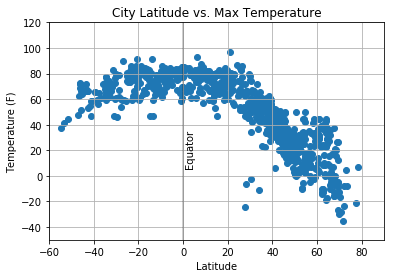

In [117]:
# plt.scatter(cities_df["Latitude"],
#            cities_df["Temperature (F)"],
#            edgecolor = "black", c= 'navy', linewidths = 1, marker = "o",
#            alpha = 0.8)
plt.scatter(cities_df["Latitude"],
            cities_df["Temperature (F)"])
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Temperature (F)")
plt.axvline(0, color = 'black', alpha = .25, label = 'Equator')
plt.text(1,30,'Equator',rotation=90)
plt.ylim(-50,120)
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.grid(True)
plt.savefig("WeatherPyGraphs/LatitudeVsTemperature.png")
plt.show()

<a id='hum_cell'></a>

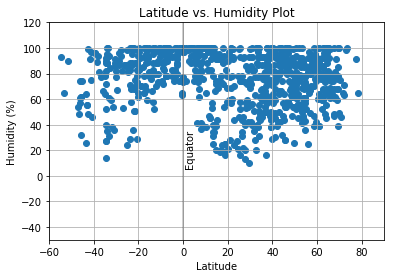

In [118]:
# Humidity (%) vs. Latitude
# lshum = cities_df["Humidity (%)"].tolist()
# plt.scatter(cities_df["Latitude"],
#            cities_df["Humidity (%)"],
#            edgecolor = "black", c= 'navy', linewidths = 1, marker = "o",
#            alpha = 0.8)
plt.scatter(cities_df["Latitude"],
            cities_df["Humidity (%)"])
plt.title("Latitude vs. Humidity Plot")
plt.ylabel("Humidity (%)")
plt.axvline(0, color = 'black', alpha = .25, label = 'Equator')
plt.text(1,30,'Equator',rotation=90)
plt.ylim(-50,120)
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.grid(True)
plt.savefig("WeatherPyGraphs/LatitudeVsHumidity.png")
plt.show()

<a id='cloud_cell'></a>

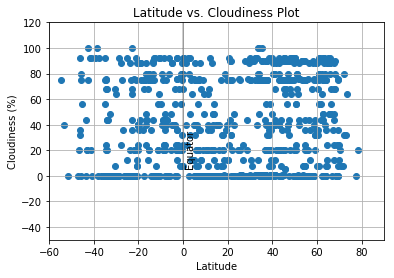

In [119]:
# Cloudiness (%) vs. Latitude
# Wind Speed (mph) vs. Latitude
# plt.scatter(cities_df["Latitude"],
#            cities_df["Cloudiness (%)"],
#            edgecolor = "black", c= 'navy', linewidths = 1, marker = "o",
#            alpha = 0.8)
plt.scatter(cities_df["Latitude"],
            cities_df["Cloudiness (%)"])
plt.title("Latitude vs. Cloudiness Plot")
plt.ylabel("Cloudiness (%)")
plt.ylim(-50,120)
plt.axvline(0, color = 'black', alpha = .25, label = 'Equator')
plt.text(1,30,'Equator',rotation=90)
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.grid(True)
plt.savefig("WeatherPyGraphs/LatitudeVsCloudiness.png")
plt.show()

<a id='wind_cell'></a>

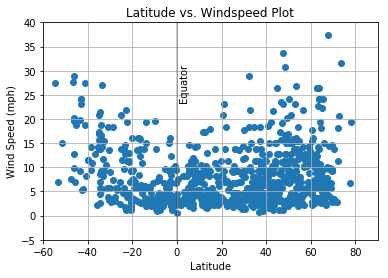

In [120]:
#Latitude vs Wind Speed
plt.scatter(cities_df["Latitude"],
            cities_df["Wind Speed (mph)"])
plt.title("Latitude vs. Windspeed Plot")
plt.ylabel("Wind Speed (mph)")
plt.axvline(0, color = 'black', alpha = .25, label = 'Equator')
plt.text(1,30,'Equator',rotation=90)
plt.ylim(-5,40)
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.grid(True)
plt.savefig("WeatherPyGraphs/LatitudeVsWindSpeed.png")
plt.show()

[Return to Top](#top_cell)